In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('Data.csv')


In [3]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,200,100,1.5,0.379
1,200,150,1.5,0.424
2,200,50,1.0,0.360
3,200,100,1.0,0.415
4,200,150,1.0,0.386


In [4]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [5]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [6]:
X=data.drop(['Tool wear\nTWmax'], axis=1)

In [7]:
y=data['Tool wear\nTWmax']

In [8]:
#MIN MAX SCALER
#scaler = preprocessing.MinMaxScaler()
#names = ['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)']
#d = scaler.fit_transform(X)
#scaled_df = pd.DataFrame(d, columns=names)
#scaled_df.head()
scale_X= StandardScaler()
scale_y= StandardScaler()

X = scale_X.fit_transform(X)
y = scale_y.fit_transform(y.values.reshape(-1, 1))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [21]:
#coefs = []
#for a in range(0,200):
#    ridge = Ridge(alpha=a)
#    ridge.fit(X_train , y_train)
#    coefs.append(clf.score(X_test, y_test))
clf_lasso = linear_model.Lasso(alpha = 0.1)
clf_ridge = linear_model.Ridge(alpha = 0.1)
clf_lasso= clf_lasso.fit(X_train , y_train)
clf_ridge= clf_ridge.fit(X_train , y_train)

In [22]:
print('Accuracy of Lasso score on Test data= {:.4f}'.format(clf_lasso.score(X_test, y_test)))
print('Accuracy score of Ridge on Test data= {:.4f}'.format(clf_ridge.score(X_test, y_test)))

Accuracy of Lasso score on Test data= 0.1986
Accuracy score of Ridge on Test data= 0.3119


In [23]:
pred=clf_lasso.predict(X_test)
pred1=clf_ridge.predict(X_test)
comparison=pd.DataFrame()

rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance Lasso")
print("RMSE: {:.4f}".format(rmse))
print("R2: {:.4f}".format(r2))


rmse = (np.sqrt(mean_squared_error(y_test, pred1)))
r2 = r2_score(y_test, pred1)
print("Testing performance Ridge")
print("RMSE: {:.4f}".format(rmse))
print("R2: {:.4f}".format(r2))

Testing performance Lasso
RMSE: 0.9217
R2: 0.1986
Testing performance Ridge
RMSE: 0.8541
R2: 0.3119


In [79]:
comparison['True Tool wear\nTWmax']=y_test.flatten()
comparison['Predicted Tool wear\nTWmax']=pred

In [80]:
comparison

,True Tool wear\nTWmax,Predicted Tool wear\nTWmax
0,-1.630063,-0.114463
1,-0.099866,0.171271
2,-1.372345,-0.245468
3,-0.808589,-0.395263
4,0.608858,-0.111996
5,-0.808589,-0.395263
6,0.028993,0.166337
7,-1.758922,0.316132
8,-1.549526,-0.390329
9,-0.422012,-0.098141


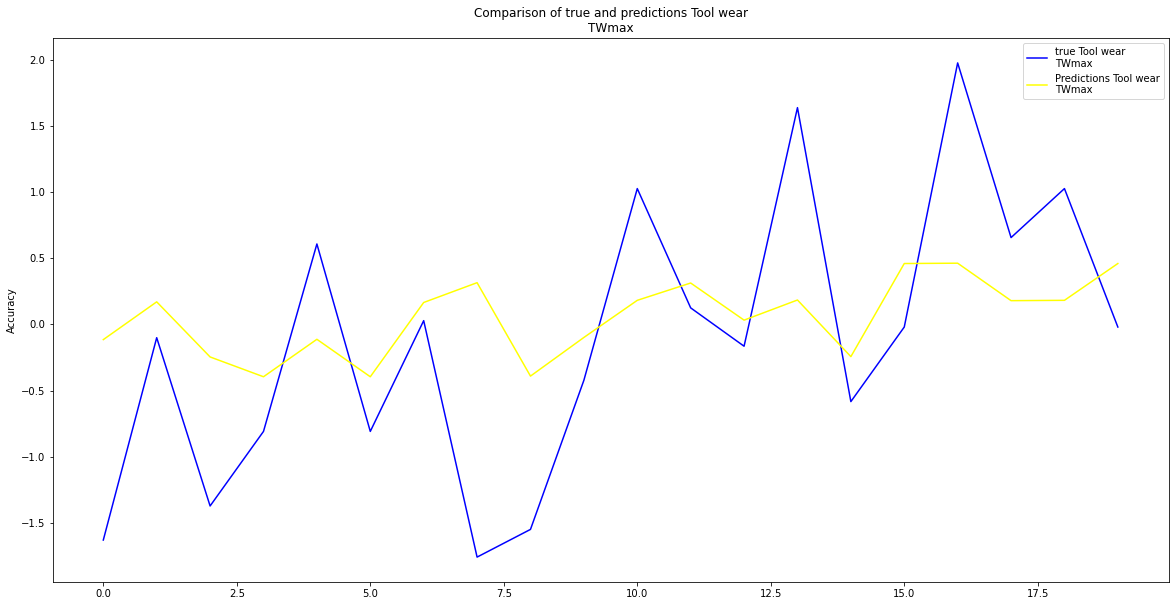

In [81]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [82]:
comparison.to_csv(r'hyper_random_forest.csv', index = False, header=True)

In [25]:
"""
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
"""

'\nmodels = []\nmodels.append((\'LR\', LogisticRegression()))\nmodels.append((\'LDA\', LinearDiscriminantAnalysis()))\nmodels.append((\'KNN\', KNeighborsClassifier()))\nmodels.append((\'CART\', DecisionTreeClassifier()))\nmodels.append((\'NB\', GaussianNB()))\nmodels.append((\'SVM\', SVC()))\n# evaluate each model in turn\nresults = []\nnames = []\nscoring = \'accuracy\'\nfor name, model in models:\n    kfold = KFold(n_splits=10, random_state=7)\n    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")\n    results.append(cv_results)\n    names.append(name)\n    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())\n    print(msg)\n# boxplot algorithm comparison\nfig = plt.figure()\nfig.suptitle(\'Algorithm Comparison\')\nax = fig.add_subplot(111)\nplt.boxplot(results)\nax.set_xticklabels(names)\nplt.show()\n'